In [1]:
from dash import callback, dcc, html, Input, Output
import dash
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

import pandas as pd
import numpy.matlib as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from process.cp_image_data import cp_image_data
from process.compile_object_data import compile_object_data
import pathlib

colorblind = ["#0173B2", "#DE8F05", "#029E73", "#D55E00", "#CC78BC",
            "#CA9161", "#FBAFE4", "#949494", "#56B4E9"]


# measurement = 'Median_soma_Intensity_MeanIntensity_CellROX'
# data_path = '/fsx/processed-data/220811 96w 9 Gene KO /2022-08-22_soma_objects/2022-08-22_soma_objects_Image.csv'
data_path = pathlib.Path('/fsx/processed-data/220811 96w 9 Gene KO /2022-10-11_soma_objects/2022-10-11_soma_objects_soma.csv')
# data, pm = cp_image_data(data_path)
exp_path = pathlib.Path('/fsx/processed-data')
drop_columns = pd.read_csv('/fsx/processed-data/220811 96w 9 Gene KO /2022-08-22_soma_objects/2022-08-30_soma_objects_soma_column_drop_list.csv', header=None, dtype=str)
pm = pd.read_csv('/fsx/processed-data/220811 96w 9 Gene KO /2022-08-22_soma_objects/soma_outlines/220811_well_conditions.csv', index_col='filename')
pm['filename'] = pm.index
data = compile_object_data(data_path, pm, drop_columns)
data = data.drop(columns=data.columns[data.isna().any()].tolist())

/home/ubuntu/miniconda3/envs/cell-imaging-2/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/ubuntu/cell-imaging/process/compile_object_data.py:31: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.loc[i] = soma_data.loc[i].mean(axis=0)
/home/ubuntu/cell-imaging/process/compile_object_data.py:57: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  d

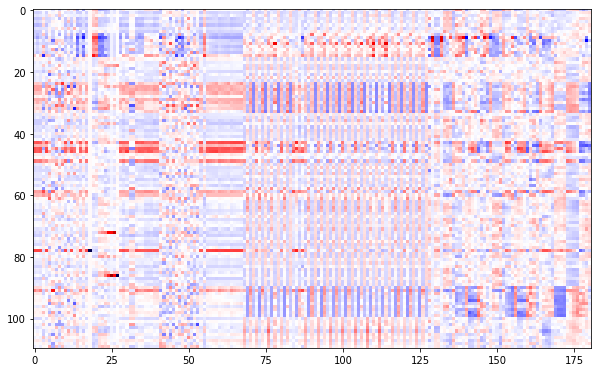

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
plt.imshow(data.sort_index(), cmap='seismic', vmin=-10, vmax=10)
# plt.axis('off')
ax = plt.gca()
ax.spines["top"].set_visible(True)
ax.spines["right"].set_visible(True)
ax.spines["bottom"].set_visible(True)
ax.spines["left"].set_visible(True)
plt.savefig('/home/ubuntu/2022-10-19_poster_feature_heatmap.svg')
plt.savefig('/home/ubuntu/2022-10-19_poster_feature_heatmap.png')